In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufc-fighters-statistics/ufc-fighters-statistics.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/kaggle/input/ufc-fighters-statistics/ufc-fighters-statistics.csv")

df.head(10)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,Gerald Strebendt,The Finishing Machine,9,7,0,175.26,70.31,NaN,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
6,Isaiah Hill,NaN,5,7,1,177.80,70.31,NaN,NaN,NaN,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5
7,Kenneth Seegrist,NaN,4,7,0,182.88,83.91,NaN,Orthodox,NaN,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,Will Kerr,NaN,9,3,0,177.80,70.31,175.26,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
9,Neil Grove,Goliath,12,8,1,198.12,120.20,NaN,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [5]:
df.drop(['name','nickname','date_of_birth'],axis=1, inplace=True)

In [6]:
df['winrate'] = df['wins'] / (df['wins']+df['losses']+df['draws'])
df = df.dropna(subset=['winrate'])
df['winrate'] = round(df['winrate'], 2)

df.drop(['wins','losses','draws'],axis=1, inplace=True)

first_column = df.pop('winrate') 
df.insert(0, 'winrate', first_column) 
df.head(5)

,winrate,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,1.00,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,0.29,185.42,83.91,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,0.59,177.80,97.98,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,0.64,167.64,61.23,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,0.80,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [7]:
df_one_hot = pd.get_dummies(df, dtype=int)
df_one_hot

,winrate,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,stance_Open Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch
0,1.00,190.50,92.99,NaN,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,0,1,0,0,0
1,0.29,185.42,83.91,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,0,0,0,0,0
2,0.59,177.80,97.98,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,0,0,0,0,0
3,0.64,167.64,61.23,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,0,0,0,0,0
4,0.80,190.50,83.91,193.04,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,0.00,175.26,106.59,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0
4107,0.25,172.72,70.31,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0
4108,0.36,180.34,77.11,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,0,1,0,0,0
4109,0.86,190.50,83.91,210.82,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0,0,0,0,1,0


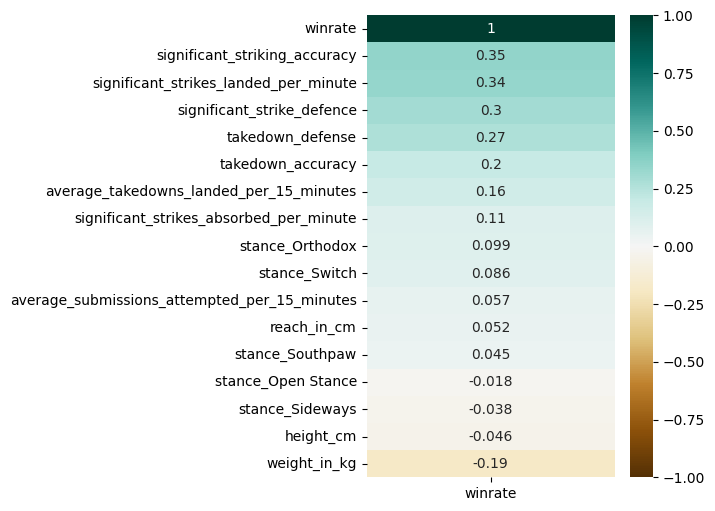

In [8]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df_one_hot.corr()[['winrate']].sort_values(by='winrate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [9]:
label = df_one_hot['winrate']

df_one_hot.drop(['winrate'],axis=1, inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_one_hot, label, test_size = 0.2, random_state=5)

In [11]:
impute = SimpleImputer(strategy = 'mean')
impute.fit(X_train)
X_train = impute.transform(X_train)
X_test = impute.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
df_pred = pd.DataFrame(y_pred)
df_pred = round(df_pred, 2)

print(df_pred)

        0
0    0.50
1    0.72
2    0.70
3    0.69
4    0.70
..    ...
814  0.67
815  0.65
816  0.64
817  0.72
818  0.73

[819 rows x 1 columns]
